In [ ]:
import pandas as pd

full_df = pd.read_csv(r"D:\Projects_25\Sentiment_analysis\senti\Datasets\eng_dataset_16L.csv", encoding= 'ISO-8859-1')

# full_df_ gets the two columns required that is the sentiment and the text
full_df_ = full_df[['text of the tweetï¿½', 'polarity of tweetï¿½']].copy()


In [17]:
df= full_df_.sample(n=10000, random_state=42)
df.columns = ['text', 'sentiment']

In [22]:
print(df.head())
print(df.shape)
print(df.columns)
print(df['sentiment'].value_counts())

                                                     text  sentiment
915963  just came bak from dancing with my NEEWWWW cd ...          4
357840  Post office, n other runnin around to do...gee...          0
613198  @SabrinaL OOOOOOH! This song....I hope he know...          0
775464  I wish iwasnt here im think'n &amp; being arou...          0
825095  http://twitpic.com/3kyv5 - All i do is twitter...          4
(10000, 2)
Index(['text', 'sentiment'], dtype='object')
sentiment
0    7658
4    2342
Name: count, dtype: int64


In [ ]:
print(full_df.columns.tolist())
df= full_df.sample(n=10000, random_state=42)


['polarity of tweetï¿½', 'id of the tweet', 'date of the tweet', 'query', 'user', 'text of the tweetï¿½']


In [ ]:
print(df.shape)
print(df.columns)
print(df.head)
print(df['sentiment'].value_counts())

<bound method NDFrame.head of         polarity of tweetï¿½  id of the tweet             date of the tweet  \
915963                     4       1753216957  Sun May 10 00:36:47 PDT 2009   
357840                     0       2044976566  Fri Jun 05 10:03:46 PDT 2009   
613198                     0       2225278282  Thu Jun 18 10:31:35 PDT 2009   
775464                     0       2321851929  Wed Jun 24 21:39:55 PDT 2009   
825095                     4       1556402846  Sat Apr 18 22:42:10 PDT 2009   
...                      ...              ...                           ...   
763100                     0       2298200881  Tue Jun 23 11:22:54 PDT 2009   
707415                     0       2256991258  Sat Jun 20 13:37:21 PDT 2009   
977429                     4       1833736546  Mon May 18 00:16:42 PDT 2009   
321684                     0       2003860185  Tue Jun 02 07:16:12 PDT 2009   
707806                     0       2257115447  Sat Jun 20 13:49:10 PDT 2009   

           query     

In [23]:
df['sentiment']= df['sentiment'].map({0:'Negative', 4:'Positive'})
print(df['sentiment'].value_counts())

sentiment
Negative    7658
Positive    2342
Name: count, dtype: int64


In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
stop_words = set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

In [34]:
def clean_text(text):
    text= text.lower()
    text=re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [35]:
df['cleaned_text'] = df['text'].apply(clean_text)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y =df['sentiment']

print(X.shape)
print(y.value_counts())

(10000, 5000)
sentiment
Negative    7658
Positive    2342
Name: count, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape, X_test.shape)

(8000, 5000) (2000, 5000)


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
print(classification_report(y_test, y_pred))


Accuracy: 79.25%
              precision    recall  f1-score   support

    Negative       0.80      0.97      0.88      1541
    Positive       0.67      0.19      0.29       459

    accuracy                           0.79      2000
   macro avg       0.74      0.58      0.59      2000
weighted avg       0.77      0.79      0.74      2000



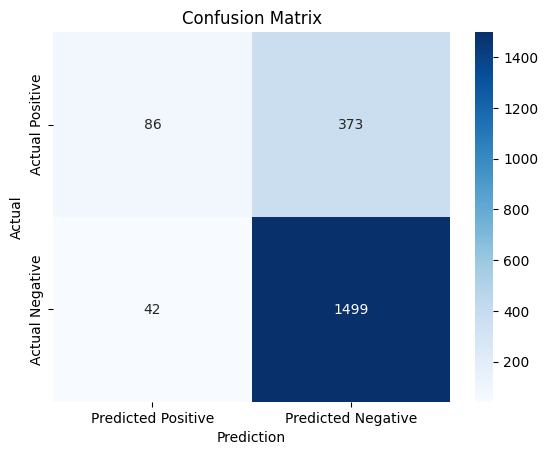

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [53]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred= nb_model.predict(X_test)
print(f"The accuracy of Naive Bayes Model is: {accuracy_score(y_test, nb_pred)*100}%")
print(classification_report(y_test, nb_pred))

The accuracy of Naive Bayes Model is: 77.64999999999999%
              precision    recall  f1-score   support

    Negative       0.78      0.99      0.87      1541
    Positive       0.64      0.06      0.11       459

    accuracy                           0.78      2000
   macro avg       0.71      0.53      0.49      2000
weighted avg       0.75      0.78      0.70      2000

